# Get DTI Data Set Stats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
order = ['biosnap', 'biosnap_mol', 'biosnap_prot', 'bindingdb', 'tdc-dg', 'davis', 'phosphatase', 'esterase', 'gt', 'halogenase', 'bkace']
dir_names = ['BIOSNAP/full_data','BIOSNAP/unseen_drug','BIOSNAP/unseen_protein','BindingDB','.', 'DAVIS','EnzPred/phosphatase_achiral_binary.csv','EnzPred/esterase_binary.csv','EnzPred/gt_acceptors_achiral_binary.csv','EnzPred/halogenase_NaCl_binary.csv','EnzPred/duf_binary.csv']
clean_names = ['BIOSNAP', 'Unseen Drugs', 'Unseen Proteins', 'BindingDB', 'TDC-DG', 'Davis', 'Phosphatase', 'Esterase', 'Glycosyltransferase', 'Halogenase', 'BKACE']

In [3]:
def get_stats(df, prefix='', drug_col='SMILES', target_col='Target Sequence', label_col='Label'):
    n_pos = len(df[df[label_col] == 1])
    n_neg = len(df[df[label_col] == 0])
    uniq_drug = len(df[drug_col].unique())
    drug_covg = np.median(df.groupby(drug_col).count()[target_col])
    uniq_prot = len(df[target_col].unique())
    prot_covg = np.median(df.groupby(target_col).count()[drug_col])
    print(f"{prefix} N Pos: {n_pos}")
    print(f"{prefix} N Neg: {n_neg}")
    print(f"{prefix} Uniq Drug: {uniq_drug} (Median Coverage: {drug_covg})")
    print(f"{prefix} Uniq Prot: {uniq_prot} (Median Coverage: {prot_covg})")
    print('--------------------------------')
    return uniq_drug, uniq_prot, drug_covg, prot_covg

6242 32601 0.19146651943191928
7047 32601 0.2161590135271924


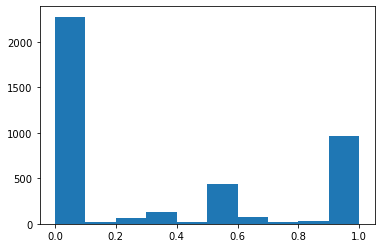

,SMILES,Target Sequence,Label,drug_encoding,target_encoding
1789,CC(C)(C)c1cc(NC(=O)Nc2ccc(cc2)-c2cn3c(n2)sc2cc...,MRGARGAWDFLCVLLLLLRVQTGSSQPSVSPGEPSPPSIHPGKSDL...,1,[0. 0. 0. ... 0. 0. 0.],[5.635 4.098 5.533 ... 0. 0. 0. ]
2181,CC(C)(C)c1cc(NC(=O)Nc2ccc(cc2)-c2cn3c(n2)sc2cc...,MRGARGAWDFLCVLLLLLRVQTGSSQPSVSPGEPSPPSIHPGKSDL...,1,[0. 0. 0. ... 0. 0. 0.],[5.635 4.098 5.533 ... 0. 0. 0. ]
3933,CC(C)(C)c1cc(NC(=O)Nc2ccc(cc2)-c2cn3c(n2)sc2cc...,MRGARGAWDFLCVLLLLLRVQTGSSQPSVSPGEPSPPSIHPGKSDL...,1,[0. 0. 0. ... 0. 0. 0.],[5.635 4.098 5.533 ... 0. 0. 0. ]
3969,CC(C)(C)c1cc(NC(=O)Nc2ccc(cc2)-c2cn3c(n2)sc2cc...,MRGARGAWDFLCVLLLLLRVQTGSSQPSVSPGEPSPPSIHPGKSDL...,1,[0. 0. 0. ... 0. 0. 0.],[5.635 4.098 5.533 ... 0. 0. 0. ]
4305,CC(C)(C)c1cc(NC(=O)Nc2ccc(cc2)-c2cn3c(n2)sc2cc...,MRGARGAWDFLCVLLLLLRVQTGSSQPSVSPGEPSPPSIHPGKSDL...,1,[0. 0. 0. ... 0. 0. 0.],[5.635 4.098 5.533 ... 0. 0. 0. ]
4889,CC(C)(C)c1cc(NC(=O)Nc2ccc(cc2)-c2cn3c(n2)sc2cc...,MRGARGAWDFLCVLLLLLRVQTGSSQPSVSPGEPSPPSIHPGKSDL...,1,[0. 0. 0. ... 0. 0. 0.],[5.635 4.098 5.533 ... 0. 0. 0. ]
11346,CC(C)(C)c1cc(NC(=O)Nc2ccc(cc2)-c2cn3c(n2)sc2cc...,MRGARGAWDFLCVLLLLLRVQTGSSQPSVSPGEPSPPSIHPGKSDL...,0,[0. 0. 0. ... 0. 0. 0.],[5.635 4.098 5.533 ... 0. 0. 0. ]
6523,CC(C)(C)c1cc(NC(=O)Nc2ccc(cc2)-c2cn3c(n2)sc2cc...,MRGARGAWDFLCVLLLLLRVQTGSSQPSVSPGEPSPPSIHPGKSDL...,1,[0. 0. 0. ... 0. 0. 0.],[5.635 4.098 5.533 ... 0. 0. 0. ]
8385,CC(C)(C)c1cc(NC(=O)Nc2ccc(cc2)-c2cn3c(n2)sc2cc...,MRGARGAWDFLCVLLLLLRVQTGSSQPSVSPGEPSPPSIHPGKSDL...,0,[0. 0. 0. ... 0. 0. 0.],[5.635 4.098 5.533 ... 0. 0. 0. ]
10505,CC(C)(C)c1cc(NC(=O)Nc2ccc(cc2)-c2cn3c(n2)sc2cc...,MRGARGAWDFLCVLLLLLRVQTGSSQPSVSPGEPSPPSIHPGKSDL...,1,[0. 0. 0. ... 0. 0. 0.],[5.635 4.098 5.533 ... 0. 0. 0. ]


In [4]:
dn = 'BindingDB'
data_dir = f"/afs/csail.mit.edu/u/s/samsl/Work/Applications/MolTrans/dataset/{dn}"
train = pd.read_csv(f"{data_dir}/train.csv",index_col=0)
val = pd.read_csv(f"{data_dir}/val.csv",index_col=0)
test = pd.read_csv(f"{data_dir}/test.csv",index_col=0)
# full_df[cn] = train
# full_df[cn] = pd.concat([train, val, test])
full = pd.concat([train, val, test])

dav = full
dav_d = 'SMILES'
dav_t = 'Target Sequence'
print(len(dav[dav.duplicated()]), len(dav), len(dav[dav.duplicated()])/len(dav))
print(len(dav[dav.duplicated(subset=[dav_d,dav_t])]), len(dav), len(dav[dav.duplicated(subset=[dav_d,dav_t])])/len(dav))

tmp = dav[dav.duplicated(keep=False, subset=[dav_d,dav_t])]\
.sort_values(by=['SMILES','Target Sequence'])\
.groupby(['SMILES','Target Sequence'])['Label'].mean()

plt.hist(tmp.values)
plt.show()

contradictions = tmp[(tmp > 0) & (tmp < 1)]

tmp_sm = contradictions.index[5][0]
tmp_se = contradictions.index[5][1]
dav[(dav['SMILES'] == tmp_sm) &\
     (dav['Target Sequence'] == tmp_se)]

In [5]:
# Load Full Data for Each

full_df = {}
colnames = {}

# Base
for cn, dn in zip([clean_names[i] for i in [0,1,2,3,5]], [dir_names[i] for i in [0,1,2,3,5]]):
    data_dir = f"../dataset/{dn}"
    train = pd.read_csv(f"{data_dir}/train.csv",index_col=0)
    val = pd.read_csv(f"{data_dir}/val.csv",index_col=0)
    test = pd.read_csv(f"{data_dir}/test.csv",index_col=0)
    full = pd.concat([train, val, test])
    full_df[cn] = full.drop_duplicates(['SMILES','Target Sequence'])
    colnames[cn] = ('SMILES','Target Sequence','Label')

# EnzPred
for cn, fn in zip(clean_names[6:], dir_names[6:]):
    data_dir = f"../dataset/{fn}"
    df_tmp = pd.read_csv(data_dir,index_col=0)
    colnames[cn] = (df_tmp.columns[1], df_tmp.columns[0], df_tmp.columns[2])
    full_df[cn] = df_tmp.drop_duplicates([df_tmp.columns[1], df_tmp.columns[0]])

# DTI-DG
from tdc.benchmark_group import dti_dg_group
dg_group = dti_dg_group(path="../dataset/TDC/")
dg_benchmark = dg_group.get("bindingdb_patent")
dg_name = dg_benchmark["name"]

train, val = dg_group.get_train_valid_split(
    benchmark=dg_name, split_type="default", seed=0
)
test = dg_benchmark["test"]
df_tmp = pd.concat([train, val, test])
full_df['TDC-DG'] = df_tmp.drop_duplicates(['Drug','Target'])
colnames['TDC-DG'] = ('Drug','Target','Y')

Found local copy...
generating training, validation splits...


In [6]:
def pivot_coverage(k, df, drug_col, target_col, label_col):
    piv = pd.pivot_table(df, values=label_col, index=drug_col, columns=target_col, aggfunc='count')
    sns.heatmap(
        piv,
        xticklabels=False,
        yticklabels=False,
        cmap='binary',
        vmin=0,
        vmax=1,
    )
    plt.title(f'{k} Coverage')
    plt.xlabel('Target')
    plt.ylabel('Drug')
    plt.show()

In [7]:
for (k, dfs, cols) in zip(full_df.keys(), full_df.values(), colnames.values()):
    print(k)
    get_stats(dfs, drug_col=cols[0], target_col=cols[1], label_col=cols[2])

BIOSNAP
 N Pos: 13836
 N Neg: 13640
 Uniq Drug: 4510 (Median Coverage: 5.0)
 Uniq Prot: 2181 (Median Coverage: 9.0)
--------------------------------
Unseen Drugs
 N Pos: 13836
 N Neg: 13640
 Uniq Drug: 4510 (Median Coverage: 5.0)
 Uniq Prot: 2181 (Median Coverage: 9.0)
--------------------------------
Unseen Proteins
 N Pos: 13836
 N Neg: 13640
 Uniq Drug: 4510 (Median Coverage: 5.0)
 Uniq Prot: 2181 (Median Coverage: 9.0)
--------------------------------
BindingDB
 N Pos: 6458
 N Neg: 19096
 Uniq Drug: 7165 (Median Coverage: 1.0)
 Uniq Prot: 1254 (Median Coverage: 7.0)
--------------------------------
Davis
 N Pos: 1045
 N Neg: 8672
 Uniq Drug: 68 (Median Coverage: 140.5)
 Uniq Prot: 379 (Median Coverage: 25.0)
--------------------------------
Phosphatase
 N Pos: 3896
 N Neg: 19648
 Uniq Drug: 108 (Median Coverage: 218.0)
 Uniq Prot: 218 (Median Coverage: 108.0)
--------------------------------
Esterase
 N Pos: 3076
 N Neg: 10940
 Uniq Drug: 96 (Median Coverage: 146.0)
 Uniq Prot: 146

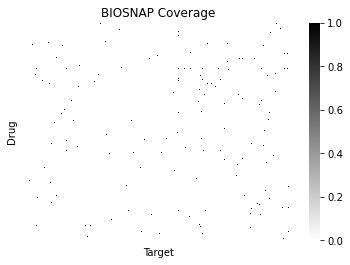

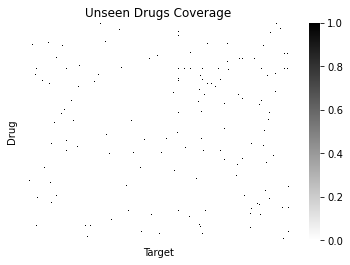

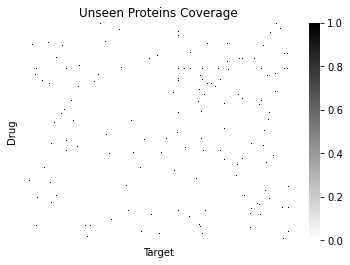

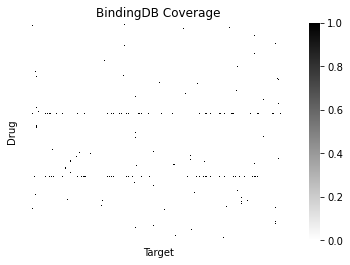

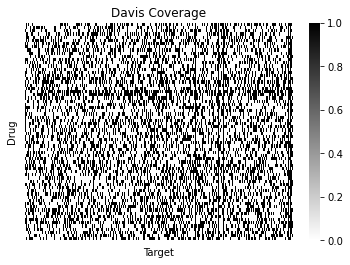

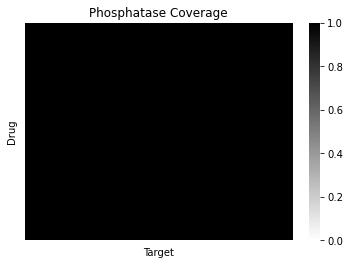

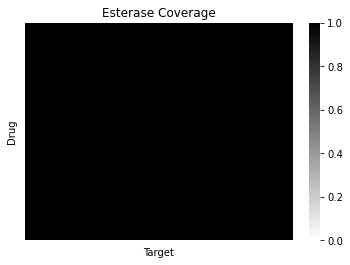

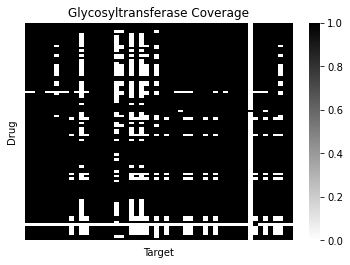

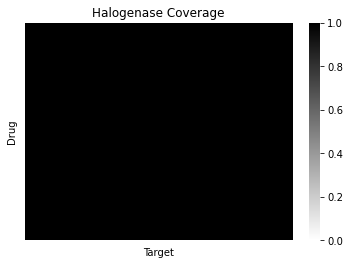

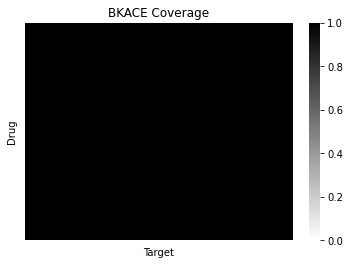

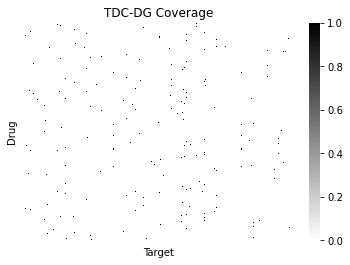

In [8]:
for (k, dfs, cols) in zip(full_df.keys(), full_df.values(), colnames.values()):
    pivot_coverage(k, dfs, *cols)

In [9]:
coverages = []
coverage_norm = []

for (k, dfs, cols) in zip(full_df.keys(), full_df.values(), colnames.values()):
    drug_group = dfs.groupby(cols[0]).count()
    target_group = dfs.groupby(cols[1]).count()
    for _, r in drug_group.iterrows():
        coverages.append((k, r.name, 'Drug', r[cols[1]]))
        coverage_norm.append((k, r.name, 'Drug', r[cols[1]]/len(target_group)))
    for _, r in target_group.iterrows():
        coverages.append((k, r.name, 'Target', r[cols[0]]))
        coverage_norm.append((k, r.name, 'Target', r[cols[0]]/len(drug_group)))
        
coverages = pd.DataFrame(coverages,columns=['Data Set','String Rep', 'Biomolecule', 'Coverage'])\
    .drop(['String Rep'],axis=1)
coverage_norm = pd.DataFrame(coverage_norm,columns=['Data Set','String Rep', 'Biomolecule', 'Coverage'])\
    .drop(['String Rep'],axis=1)

In [10]:
coverages.groupby(['Data Set', 'Biomolecule']).median().loc[clean_names]

Coverage
Data Set            Biomolecule          
BIOSNAP             Drug              5.0
                    Target            9.0
Unseen Drugs        Drug              5.0
                    Target            9.0
Unseen Proteins     Drug              5.0
                    Target            9.0
BindingDB           Drug              1.0
                    Target            7.0
TDC-DG              Drug              1.0
                    Target           77.0
Davis               Drug            140.5
                    Target           25.0
Phosphatase         Drug            218.0
                    Target          108.0
Esterase            Drug            146.0
                    Target           96.0
Glycosyltransferase Drug             50.0
                    Target           88.0
Halogenase          Drug             42.0
                    Target           62.0
BKACE               Drug            161.0
                    Target           17.0

In [11]:
from IPython.display import display
# with pd.option_context('display.float_format', '{:.4E}'.format):
with pd.option_context('display.float_format', '{:.4f}'.format):
    display(coverage_norm.groupby(['Data Set', 'Biomolecule']).median().loc[clean_names])

Coverage
Data Set            Biomolecule          
BIOSNAP             Drug           0.0023
                    Target         0.0020
Unseen Drugs        Drug           0.0023
                    Target         0.0020
Unseen Proteins     Drug           0.0023
                    Target         0.0020
BindingDB           Drug           0.0008
                    Target         0.0010
TDC-DG              Drug           0.0021
                    Target         0.0005
Davis               Drug           0.3707
                    Target         0.3676
Phosphatase         Drug           1.0000
                    Target         1.0000
Esterase            Drug           1.0000
                    Target         1.0000
Glycosyltransferase Drug           0.9259
                    Target         0.9778
Halogenase          Drug           1.0000
                    Target         1.0000
BKACE               Drug           1.0000
                    Target         1.0000

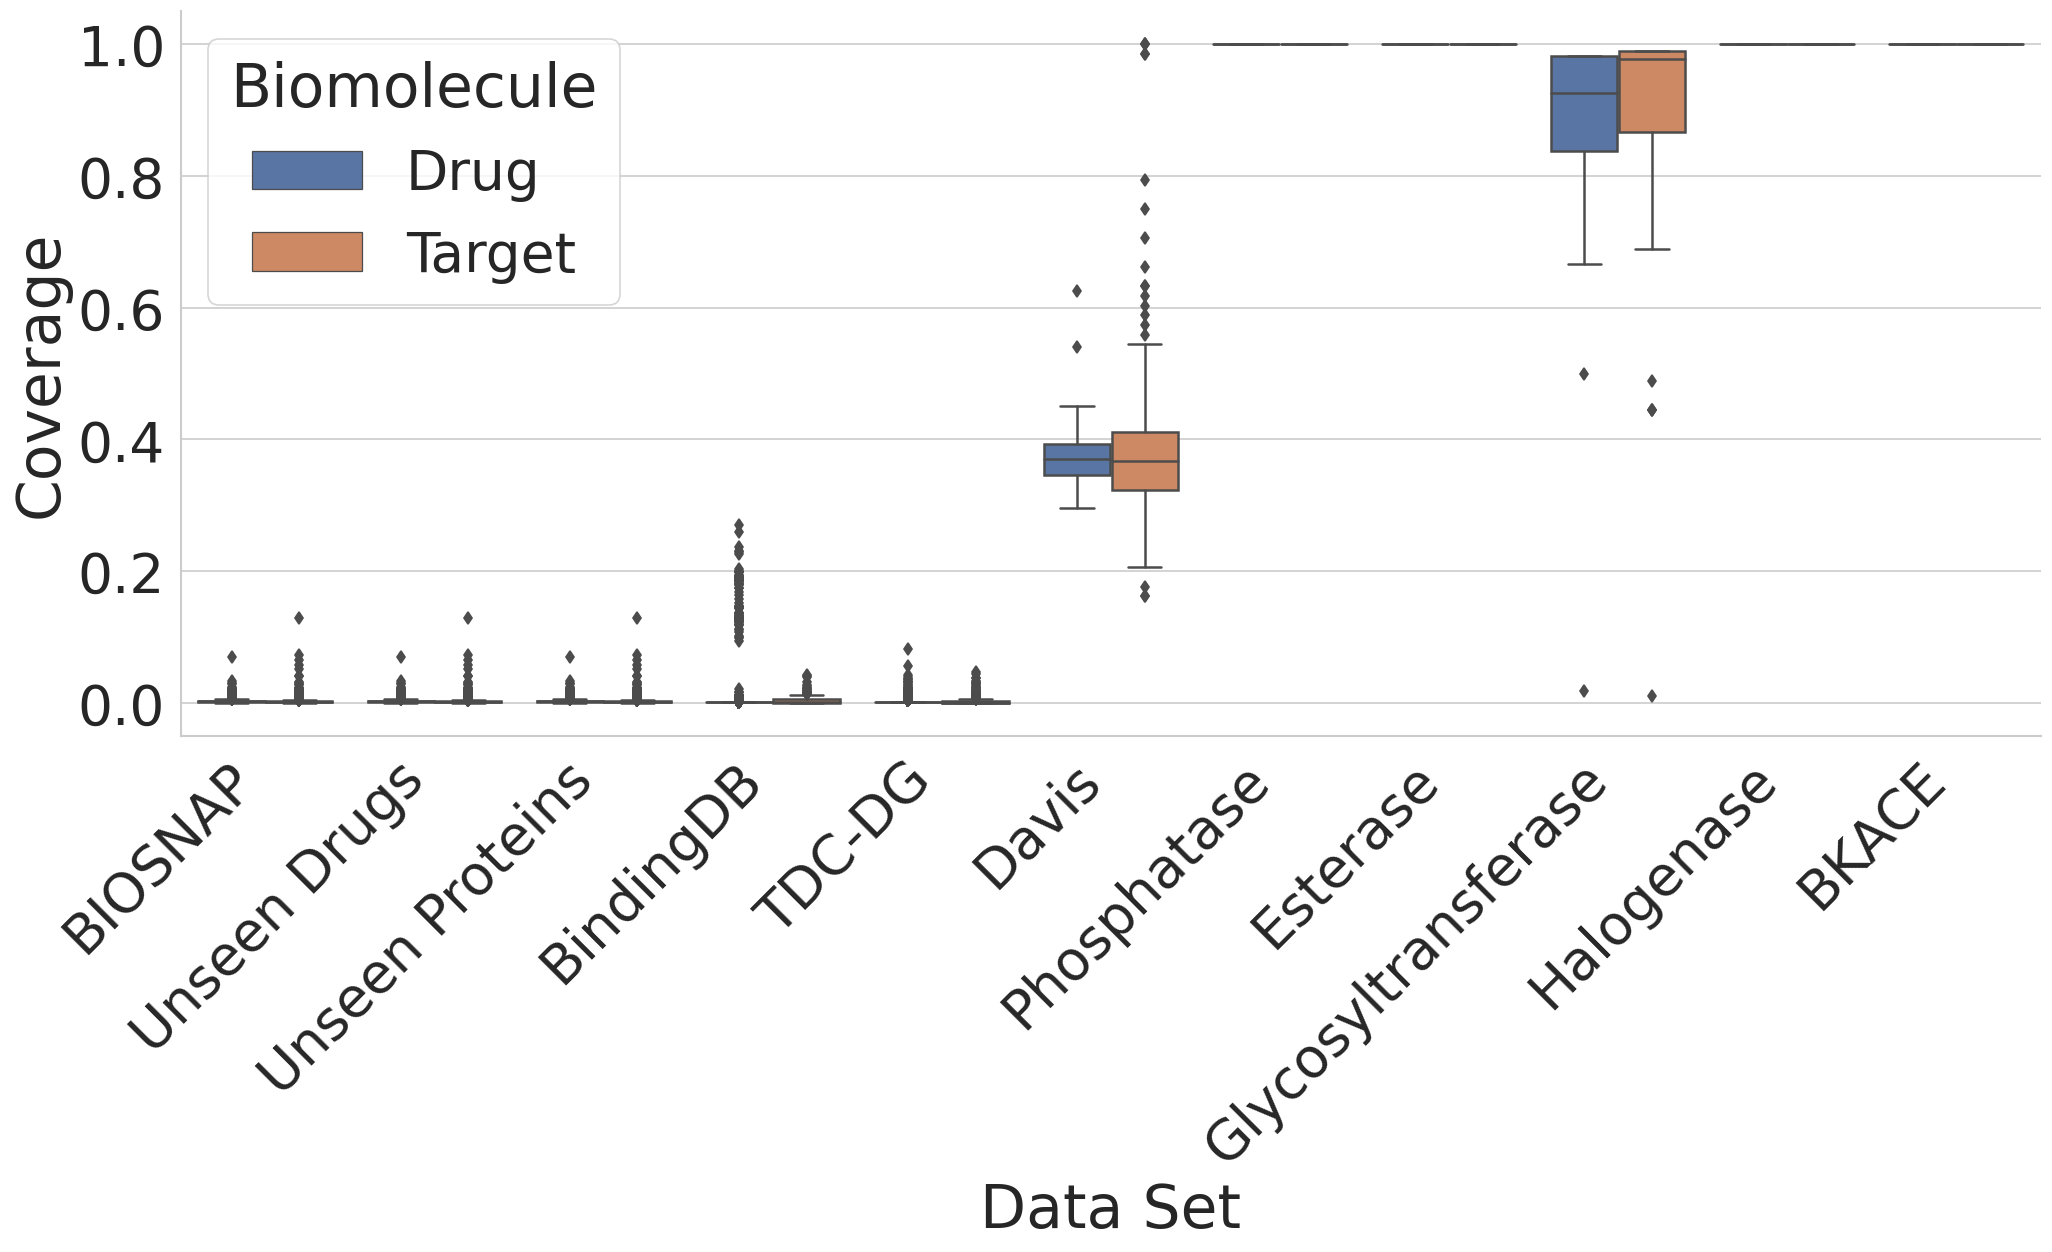

In [14]:
plt.figure(figsize=(20, 8), dpi=120)
sns.set(style='whitegrid',font_scale=3)

sns.boxplot(data=coverage_norm,
            x='Data Set',
            y='Coverage',
            hue='Biomolecule',
            order=clean_names,
           )
plt.xticks(rotation=45,ha='right')
# plt.yscale('log')
# plt.ylim(0,1)
# plt.title("Data Set Coverage")
sns.despine()
plt.savefig('../img/coverage_boxplot.png',bbox_inches='tight')
# plt.savefig('../img/coverage_boxplot.svg',bbox_inches='tight')
plt.show()